In [1]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

In [3]:
import io
from PIL import Image
import ipywidgets as widgets
from IPython.display import Markdown, display

In [5]:
display(Markdown("****MNIST IMAGE CLASSIFICATION****"))

****MNIST IMAGE CLASSIFICATION****

In [6]:
btn_image = widgets.FileUpload()
out_pl = widgets.Output()
out_pl.clear_output()
out_img = widgets.Output()
out_img.clear_output()

btn_run = widgets.Button(description="Detect")

In [7]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [8]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In [11]:
def on_click_classify(change):
  model = torch.load('pytorch_nn.pt', map_location='cpu')

  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  # model.to(device)
  model.eval()

  img_file = btn_image.data[-1] # bytes code
  # img = Image.open(io.BytesIO(img))
  out_pl.clear_output()
  img = Image.open(io.BytesIO(img_file)).convert('L')
  img_tr = transform(img)
  final_img = img_tr.reshape([28, 28]).view(1, 784)

  with torch.no_grad():
      logps = model(final_img)

  # Output of the network are log-probabilities, need to take exponential for probabilities
  ps = torch.exp(logps)
  probab = list(ps.cpu().numpy()[0])
  print("Predicted Digit =", probab.index(max(probab)))
  view_classify(img_tr.view(1, 28, 28), logps)

In [12]:
def on_upload_display(change):
    img = btn_image.data[-1] # bytes code
    img = Image.open(io.BytesIO(img))
    out_pl.clear_output()
    with out_pl:
        display(img)

In [13]:
btn_run.on_click(on_click_classify)
instruction_labl = widgets.Label("Upload your image")
Run_labl = widgets.Label("Click on Detect for Prediction")
input_widgets = widgets.VBox([instruction_labl, btn_image,Run_labl, widgets.HBox([btn_run])])
output_widgets = widgets.HBox([out_pl, out_img])

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Predicted Digit = 7


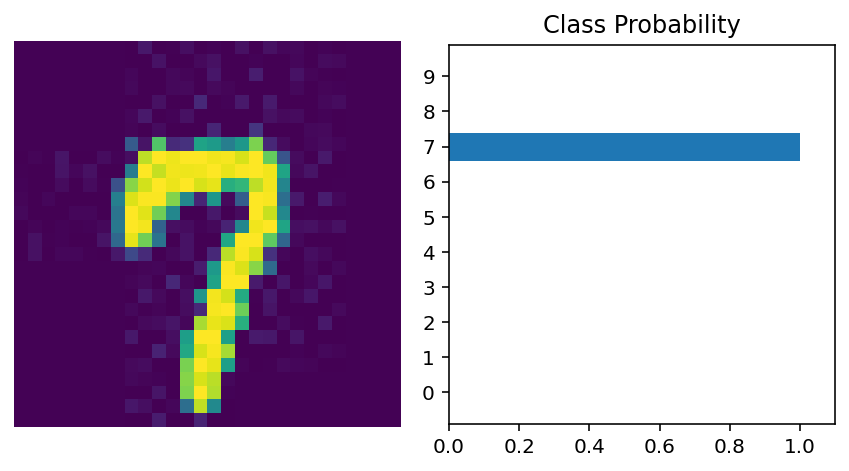

In [14]:
widgets.VBox([input_widgets, output_widgets])